In [1]:
import os
print(os.getcwd()) #print working dir
import matplotlib
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
from matplotlib import gridspec
import time
import pandas as pd
import numpy as np

from importlib import reload
os.sys.path.insert(0, '../src/')
import eval_hsj
reload(eval_hsj)

output_path = './../results/figures/hsja'
is_plot_title = False
is_save_fig = True

# print(plt.style.available)
# print(plt.rcParams)
plt.style.use(['seaborn-darkgrid', 'seaborn-paper'])
label_size = 18
tick_size = 14
plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rc('axes', titlesize=label_size)
plt.rc('axes', labelsize=label_size)
plt.rc('xtick', labelsize=tick_size)
plt.rc('ytick', labelsize=tick_size)


c:\Users\uria\vmplayer_shared\Pnml_code\deep_pnml\notebooks


## MNIST

In [15]:
# Test 2000 MNIST samples using pnml model from - ./trained_models/mnist_classifier/bpda_ep6_eps0.3_restant20_uniformRnd/model_iter_6.pt
# hop skip jump attack 50 iterations
pnml_hsj_res_path = './../results/MNIST/hop_skip/mnist_pnml'
erm_hsj_res_path = './../results/MNIST/hop_skip/mnist_model'

In [23]:
adv_l_repack_pnml = eval_hsj.load_pickles(pnml_hsj_res_path)
pnml_res_df = eval_hsj.adv_results_repacked_to_df(adv_l_repack_pnml)

adv_l_repack_erm = eval_hsj.load_pickles(erm_hsj_res_path)
erm_res_df = eval_hsj.adv_results_repacked_to_df(adv_l_repack_erm)





In [24]:
print("pnml_res_df size:{}".format(len(pnml_res_df)))
print("erm_res_df size:{}".format(len(erm_res_df)))
print("Number of queries (pnml): {}".format(pnml_res_df.loc[:,"queries"].max()))
print("Number of queries (erm): {}".format(erm_res_df.loc[:,"queries"].max()))
# print(pnml_res_df.loc[pnml_res_df.loc[:,"distance"] < 0.3])
eps_step = 0.05
eps = 0
ind = 0
acc_df = pd.DataFrame(columns=["eps", "acc_nml", "acc_erm"])
while eps <= 0.5:
    acc_nml = np.sum(pnml_res_df.loc[:,"distance"] > eps) / len(pnml_res_df)
    acc_erm = np.sum(erm_res_df.loc[:,"distance"] > eps) / len(erm_res_df)
    acc_df.loc[ind] = [eps, acc_nml, acc_erm]
    eps += eps_step
    ind += 1


pnml_res_df size:9750
erm_res_df size:9000
Number of queries (pnml): 26009.0
Number of queries (erm): 25348.0


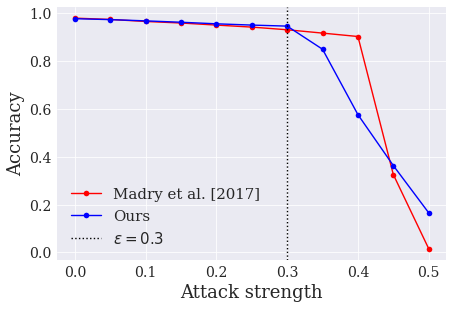

Adv. pNML HSJA accuracy: 0.9463589743589743
Normal model HSJA accuracy: 0.9311111111111111
Adv. pNML HSJA median: 0.4023784371209545
Normal model HSJA median: 0.44157531270381667
     eps   acc_nml   acc_erm
0   0.00  0.977333  0.979778
1   0.05  0.973538  0.974222
2   0.10  0.968308  0.965778
3   0.15  0.962564  0.959333
4   0.20  0.956000  0.950667
5   0.25  0.950667  0.942222
6   0.30  0.946359  0.931111
7   0.35  0.849538  0.917111
8   0.40  0.575897  0.902889
9   0.45  0.362872  0.325333
10  0.50  0.165231  0.015222


In [25]:
plt.plot(acc_df['eps'],acc_df['acc_erm'], 'ro-', label="Madry et al. [2017]")
plt.plot(acc_df['eps'],acc_df['acc_nml'], 'bo-', label="Ours")
plt.axvline(x=0.3, color='k', linestyle='dotted', label='$\epsilon=0.3$')
plt.legend(fontsize=15, ncol=1, loc=3)
plt.xlabel('Attack strength')
plt.ylabel('Accuracy')
plt.savefig(os.path.join(output_path, 'fig_mnist_hsja.pdf'), dpi=200,
            bbox_inches=plt.tight_layout()) if is_save_fig else None
plt.show()
print("Adv. pNML HSJA accuracy: {}".format(np.sum(pnml_res_df.loc[:,"distance"] > 0.3) / len(pnml_res_df)))
print("Normal model HSJA accuracy: {}".format(np.sum(erm_res_df.loc[:,"distance"] > 0.3) / len(erm_res_df)))

print("Adv. pNML HSJA median: {}".format(np.median(pnml_res_df.loc[:,"distance"])))
print("Normal model HSJA median: {}".format(np.median(erm_res_df.loc[:,"distance"])))
print(acc_df)

## CIFAR

In [6]:
# Test 2000 CIFAR samples using pnml model from - ./trained_models/downloaded_models/rst_adv.pt.ckpt
# hop skip jump attack 50 iterations
pnml_hsj_cifar_path1 = './../results/cifar/hop_skip/pnml_0_2000/pnml_0_1000'
pnml_hsj_cifar_path2 = './../results/cifar/hop_skip/pnml_0_2000/pnml_1000_2000'
erm_hsj_cifar_path = './../results/cifar/hop_skip/erm_0_2000'

In [7]:
adv_l_repack_pnml1 = eval_hsj.load_pickles(pnml_hsj_cifar_path1)
pnml_res_df1 = eval_hsj.adv_results_repacked_to_df(adv_l_repack_pnml1)
adv_l_repack_pnml2 = eval_hsj.load_pickles(pnml_hsj_cifar_path2)
pnml_res_df2 = eval_hsj.adv_results_repacked_to_df(adv_l_repack_pnml2)
pnml_res_df = pd.concat([pnml_res_df1, pnml_res_df2])
print("pnml result DF size: {}".format(len(pnml_res_df)))

adv_l_repack_erm = eval_hsj.load_pickles(erm_hsj_cifar_path)
erm_res_df = eval_hsj.adv_results_repacked_to_df(adv_l_repack_erm)



pnml result DF size: 2000


In [8]:
print("pnml_res_df size:{}".format(len(pnml_res_df)))
print("erm_res_df size:{}".format(len(erm_res_df)))
print("Number of queries (pnml): {}".format(pnml_res_df.loc[:,"queries"].max()))
print("Number of queries (erm): {}".format(erm_res_df.loc[:,"queries"].max()))
eps_step = 0.01
eps = 0
ind = 0
acc_df = pd.DataFrame(columns=["eps", "acc_nml", "acc_erm"])
while eps <= 0.5:
    acc_nml = np.sum(pnml_res_df.loc[:,"distance"] > eps) / len(pnml_res_df)
    acc_erm = np.sum(erm_res_df.loc[:,"distance"] > eps) / len(erm_res_df)
    acc_df.loc[ind] = [eps, acc_nml, acc_erm]
    eps += eps_step
    ind += 1

pnml_res_df size:2000
erm_res_df size:2000
Number of queries (pnml): 25757.0
Number of queries (erm): 25419.0


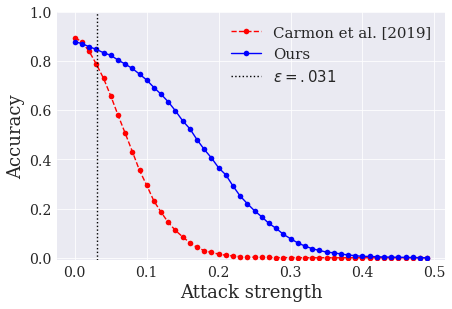

Adv. pNML HSJA accuracy: 0.845
Normal model HSJA accuracy: 0.7825
Max accuracy improvement: 0.491
Adv. pNML HSJA median: 0.16536155343055725
Normal model HSJA median: 0.07077695429325104
     eps  acc_nml  acc_erm   delta
0   0.00   0.8795   0.8965 -0.0170
1   0.01   0.8715   0.8785 -0.0070
2   0.02   0.8590   0.8400  0.0190
3   0.03   0.8480   0.7880  0.0600
4   0.04   0.8345   0.7300  0.1045
5   0.05   0.8240   0.6590  0.1650
6   0.06   0.8050   0.5815  0.2235
7   0.07   0.7885   0.5075  0.2810
8   0.08   0.7705   0.4325  0.3380
9   0.09   0.7475   0.3555  0.3920
10  0.10   0.7235   0.2950  0.4285
11  0.11   0.6930   0.2310  0.4620
12  0.12   0.6655   0.1855  0.4800
13  0.13   0.6345   0.1435  0.4910
14  0.14   0.5980   0.1110  0.4870
15  0.15   0.5575   0.0850  0.4725
16  0.16   0.5250   0.0610  0.4640
17  0.17   0.4805   0.0420  0.4385
18  0.18   0.4410   0.0290  0.4120
19  0.19   0.4065   0.0215  0.3850
20  0.20   0.3660   0.0150  0.3510
21  0.21   0.3375   0.0100  0.3275
22  0.22

In [9]:
plt.plot(acc_df['eps'],acc_df['acc_erm'], 'ro--', label="Carmon et al. [2019]") 
plt.plot(acc_df['eps'],acc_df['acc_nml'], 'bo-', label="Ours")

acc_df['delta'] = acc_df['acc_nml'] - acc_df['acc_erm']

axes = plt.gca()
axes.set_ylim([-0.01, 1.0])
plt.axvline(x=0.031, color='k', linestyle='dotted', label='$\epsilon=.031$')
plt.legend(fontsize=15, ncol=1, loc=1)
plt.xlabel('Attack strength')
plt.ylabel('Accuracy')
plt.savefig(os.path.join(output_path, 'fig_cifar_hsja.pdf'), dpi=200,
            bbox_inches=plt.tight_layout()) if is_save_fig else None
plt.show()
print("Adv. pNML HSJA accuracy: {}".format(np.sum(pnml_res_df.loc[:,"distance"] > 0.031) / len(pnml_res_df)))
print("Normal model HSJA accuracy: {}".format(np.sum(erm_res_df.loc[:,"distance"] > 0.031) / len(erm_res_df)))
print("Max accuracy improvement: {}".format((acc_df['acc_nml'] - acc_df['acc_erm']).max()))

print("Adv. pNML HSJA median: {}".format(np.median(pnml_res_df.loc[:,"distance"])))
print("Normal model HSJA median: {}".format(np.median(erm_res_df.loc[:,"distance"])))
print(acc_df)

## Imagenet

HSJA with 29 iterations over 100 samples (1 sample per class for the first 100 classes).

In [19]:
pnml_hsj_imagenet_path = './../results/imagenet/hsja/hsja_pnml'
erm_hsj_imagenet_path = './../results/imagenet/hsja/hsja_nopnml'

In [20]:
adv_l_repack_pnml = eval_hsj.load_pickles(pnml_hsj_imagenet_path)
pnml_res_df = eval_hsj.adv_results_repacked_to_df(adv_l_repack_pnml)
print("pnml result DF size: {}".format(len(pnml_res_df)))

adv_l_repack_erm = eval_hsj.load_pickles(erm_hsj_imagenet_path)
erm_res_df = eval_hsj.adv_results_repacked_to_df(adv_l_repack_erm)
print("erm result DF size: {}".format(len(erm_res_df)))

pnml result DF size: 100
erm result DF size: 100


In [21]:
eps_step = 0.01
eps = 0
ind = 0
acc_df = pd.DataFrame(columns=["eps", "acc_nml", "acc_erm"])
while eps <= 0.5:
    acc_nml = np.sum(pnml_res_df.loc[:,"distance"] > eps) / len(pnml_res_df)
    acc_erm = np.sum(erm_res_df.loc[:,"distance"] > eps) / len(erm_res_df)
    acc_df.loc[ind] = [eps, acc_nml, acc_erm]
    eps += eps_step
    ind += 1

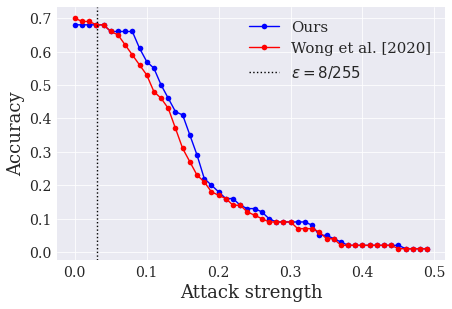

Adv. pNML HSJA accuracy: 0.68
Normal model HSJA accuracy: 0.68
Adv. pNML HSJA median: 0.12028460204601288
Normal model HSJA median: 0.10571205615997314
     eps  acc_nml  acc_erm
0   0.00     0.68     0.70
1   0.01     0.68     0.69
2   0.02     0.68     0.69
3   0.03     0.68     0.68
4   0.04     0.68     0.68
5   0.05     0.66     0.66
6   0.06     0.66     0.65
7   0.07     0.66     0.62
8   0.08     0.66     0.59
9   0.09     0.61     0.56
10  0.10     0.57     0.53
11  0.11     0.55     0.48
12  0.12     0.50     0.46
13  0.13     0.46     0.43
14  0.14     0.42     0.37
15  0.15     0.41     0.31
16  0.16     0.35     0.27
17  0.17     0.29     0.23
18  0.18     0.22     0.21
19  0.19     0.20     0.18
20  0.20     0.18     0.17
21  0.21     0.16     0.16
22  0.22     0.16     0.14
23  0.23     0.14     0.14
24  0.24     0.13     0.12
25  0.25     0.13     0.11
26  0.26     0.12     0.10
27  0.27     0.10     0.09
28  0.28     0.09     0.09
29  0.29     0.09     0.09
30  0.30   

In [22]:
plt.plot(acc_df['eps'],acc_df['acc_nml'], 'bo-', label="Ours")
plt.plot(acc_df['eps'],acc_df['acc_erm'], 'ro-', label="Wong et al. [2020]")
plt.axvline(x=8/255, color='k', linestyle='dotted', label='$\epsilon=8/255$')
plt.legend(fontsize=15, ncol=1, loc=1)
plt.xlabel('Attack strength')
plt.ylabel('Accuracy')
plt.savefig(os.path.join(output_path, 'fig_imagenet_hsja.pdf'), dpi=200, 
            bbox_inches=plt.tight_layout()) if is_save_fig else None
plt.show()
print("Adv. pNML HSJA accuracy: {}".format(np.sum(pnml_res_df.loc[:,"distance"] > 0.031) / len(pnml_res_df)))
print("Normal model HSJA accuracy: {}".format(np.sum(erm_res_df.loc[:,"distance"] > 0.031) / len(erm_res_df)))

print("Adv. pNML HSJA median: {}".format(np.median(pnml_res_df.loc[:,"distance"])))
print("Normal model HSJA median: {}".format(np.median(erm_res_df.loc[:,"distance"])))
print(acc_df)
print("Number of queries: {}".format(pnml_res_df.loc[0,"queries"]))